In [ ]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [ ]:
dataset = pandas.read_csv("sonar.csv")
dataset.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [ ]:
#unique values of each categorical column
categorical_columns=[]
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        categorical_columns.append(i)
       
for column in categorical_columns:
    print(f'{ column.upper() }:{dataset[column].unique()}')
    print('\n')

CLASS:['Rock' 'Mine']




In [ ]:
dataset.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


# **Preprocessing**

**splitting the dataset into features and label**

In [ ]:
features = dataset.iloc[:,0:-1].values
label = dataset.iloc[:,-1].values

**Encoding The Boolean label** 

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
label = labelEncoder.fit_transform(label)

**Splitting The Data Into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features,label, test_size = 0.2, random_state = 1)

# **LOGISTIC REGRESSION**

**Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
c_range = [0.001,0.01,0.1,1,10,100]
for c in c_range:
   # training the classifier with different values of c
   classifier = LogisticRegression(max_iter=600, C=c)
   #train the classifier
   classifier.fit(features_train, label_train)  

**Testing The Model On The Test Set**

In [65]:
#prediction
predicted_labels = classifier.predict(features_test)

**Logistic Regression Results Performance**

Accuracy In Decimal: 0.7619047619047619


Classification Report

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.83      0.68      0.75        22

    accuracy                           0.76        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.77      0.76      0.76        42



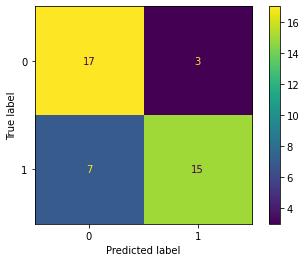

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score,classification_report 
accuracy = accuracy_score(actual_labels, predicted_labels)
print("Accuracy In Decimal: "+str(accuracy))
# Print the Classification Report
cr = classification_report(actual_labels, predicted_labels)
print("\n\nClassification Report\n")
print(cr)
confusion_matrix = confusion_matrix(actual_labels, predicted_labels)
display_matrix = ConfusionMatrixDisplay(confusion_matrix)
display_matrix.plot()
plt.show()